In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
print(X)

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.241

In [ ]:
X.isnull().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


In [ ]:
print(y)

    Diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]


/tmp/ipython-input-2057314657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y['Diagnosis'], palette={"M": "#c26170ff", "B": "#6ecfd8"})


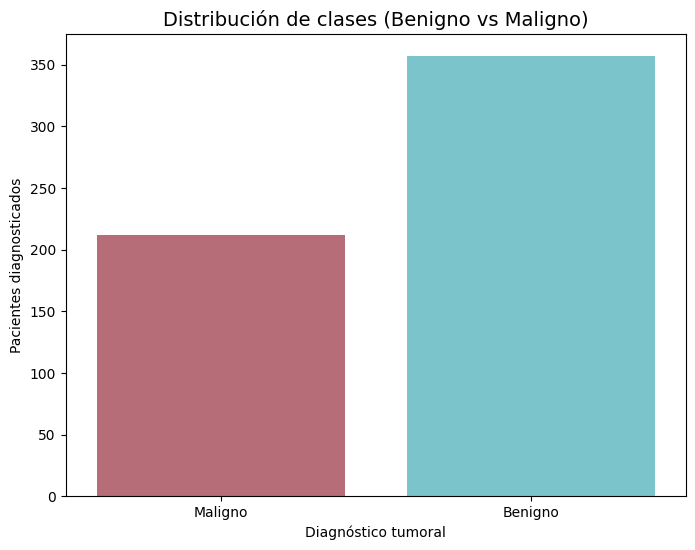

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=y['Diagnosis'], palette={"M": "#c26170ff", "B": "#6ecfd8"})

# Set x-axis labels
plt.xticks([0, 1], ['Maligno', 'Benigno'])

# Set x-axis title
plt.xlabel('Diagnóstico tumoral')

# Set y-axis title
plt.ylabel('Pacientes diagnosticados')

plt.title("Distribución de clases (Benigno vs Maligno)", fontsize=14)
plt.show()


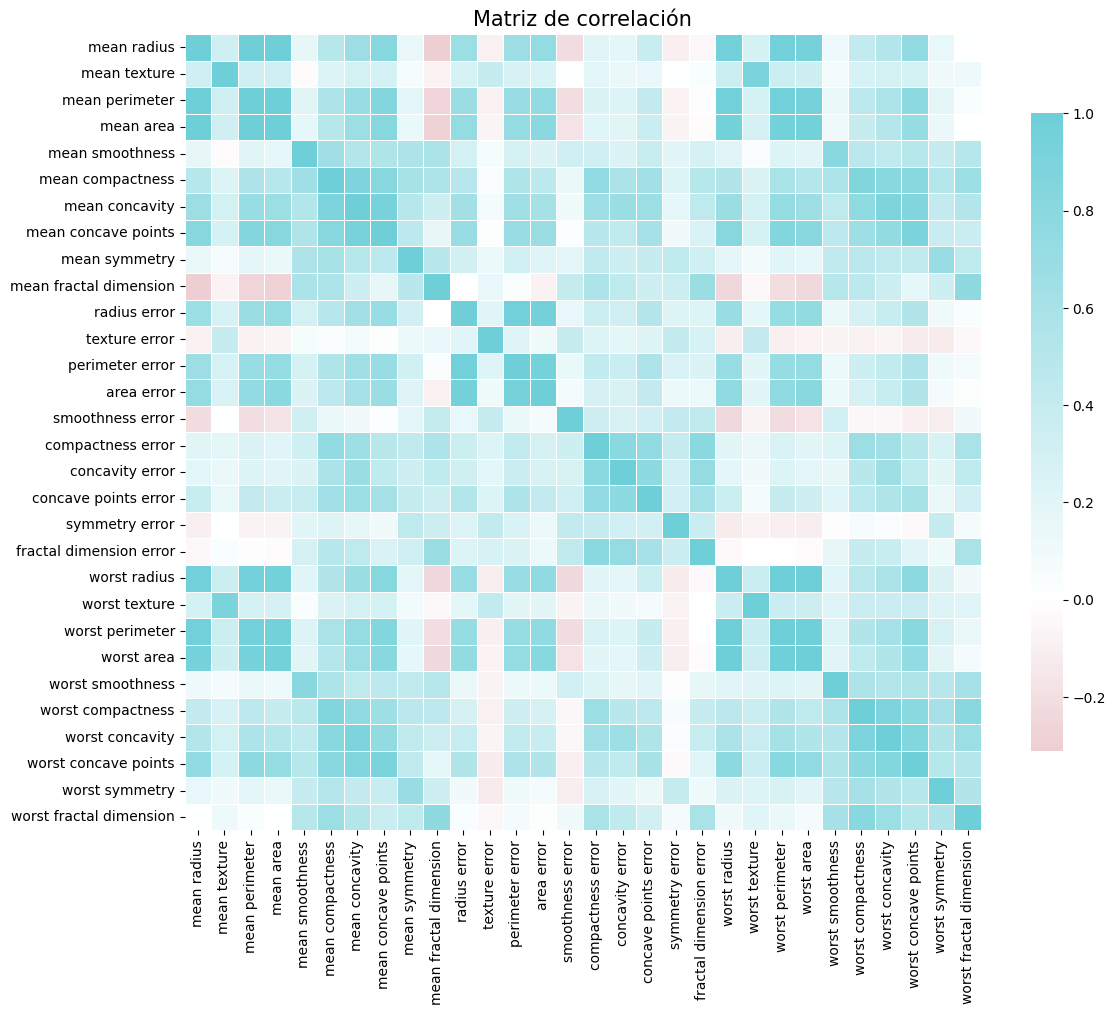

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

colors = ["#c26170", "#ffffff", "#6ecfd8"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

corr = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap=custom_cmap, center=0, annot=False, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Matriz de correlación", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

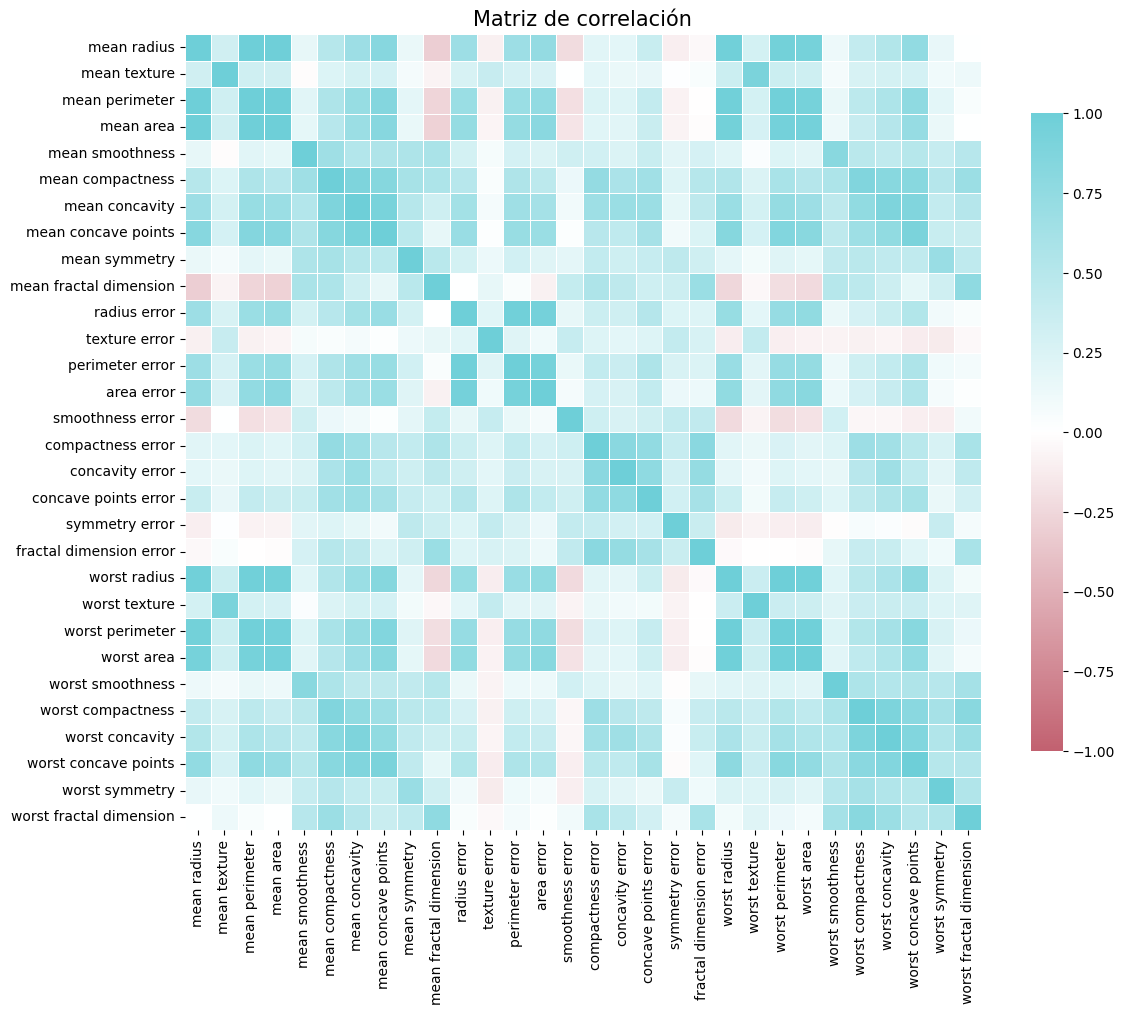

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap=custom_cmap, center=0, annot=False, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)
plt.title("Matriz de correlación", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


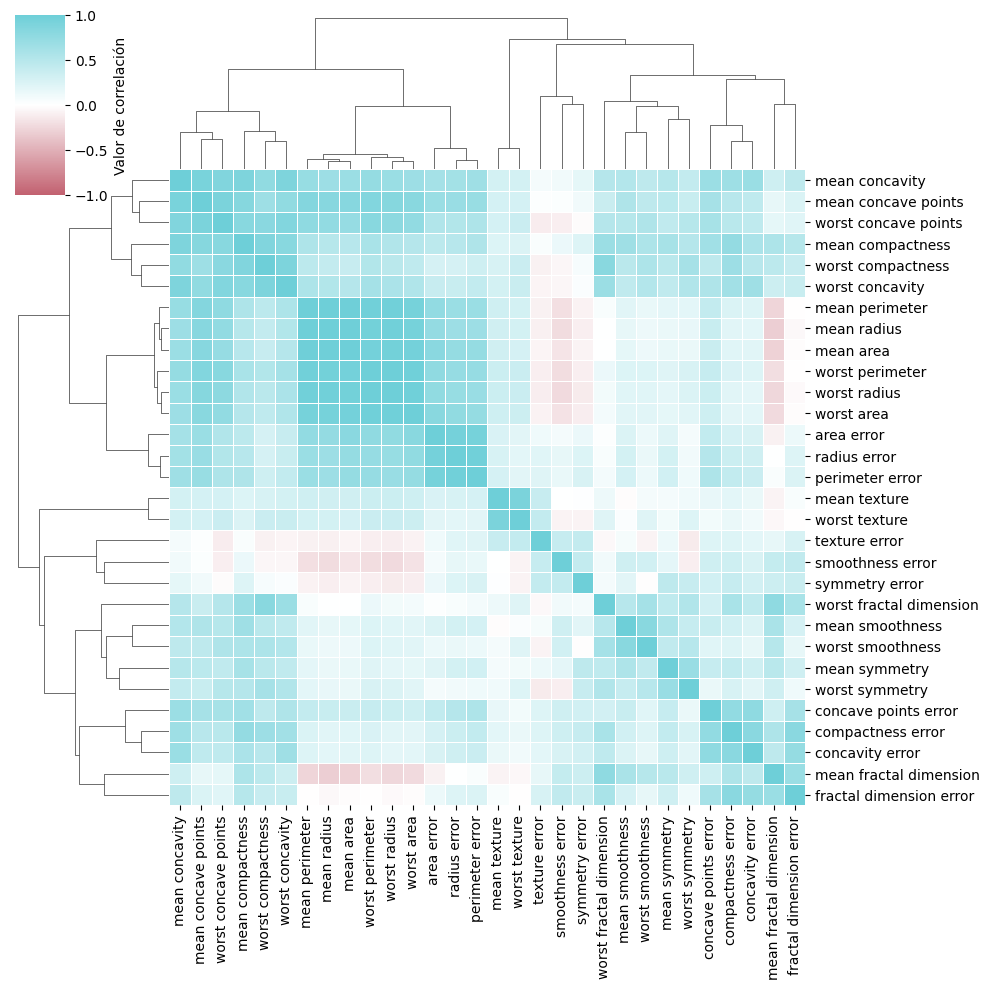

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#c26170", "#ffffff", "#6ecfd8"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

g = sns.clustermap(
    corr,
    cmap=custom_cmap,
    center=0,
    annot=False,
    square=True,
    linewidths=0.5,
    vmin=-1, vmax=1,
    cbar_kws={"label": "Valor de correlación"})




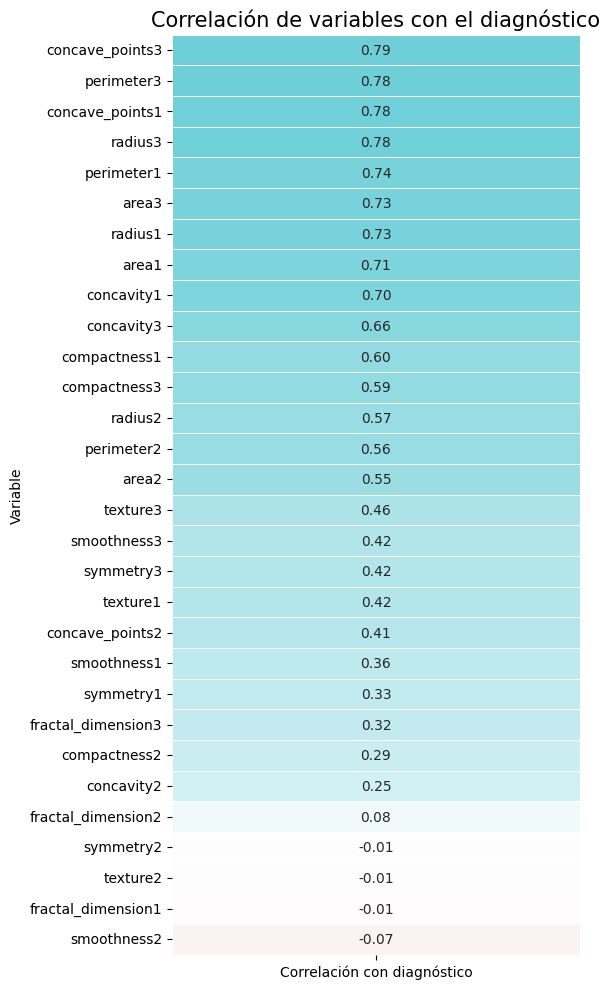

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Convertir Diagnosis a 0 (benigno) y 1 (maligno)
y_num = y['Diagnosis'].map({'B': 0, 'M': 1})

# Concatenar X con la variable Diagnosis codificada
df = X.copy()
df['Diagnosis'] = y_num

# Calcular correlación entre cada variable y el diagnóstico
correlations = df.corr()['Diagnosis'].drop('Diagnosis').sort_values()

# Crear DataFrame para visualización
corr_df = pd.DataFrame(correlations)
corr_df.columns = ['Correlación con diagnóstico']
corr_df['Tipo'] = np.where(corr_df['Correlación con diagnóstico'] > 0, 'Maligno', 'Benigno')
corr_df = corr_df.sort_values(by='Correlación con diagnóstico', ascending=False)

# Crear colormap personalizado
colors = ["#c26170", "#ffffff", "#6ecfd8"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Crear mapa de calor
plt.figure(figsize=(6, 10))
sns.heatmap(corr_df[['Correlación con diagnóstico']], cmap=custom_cmap, center=0,
            annot=True, fmt=".2f", linewidths=0.5, cbar=False)

plt.title("Correlación de variables con el diagnóstico", fontsize=15)
plt.xlabel("")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()




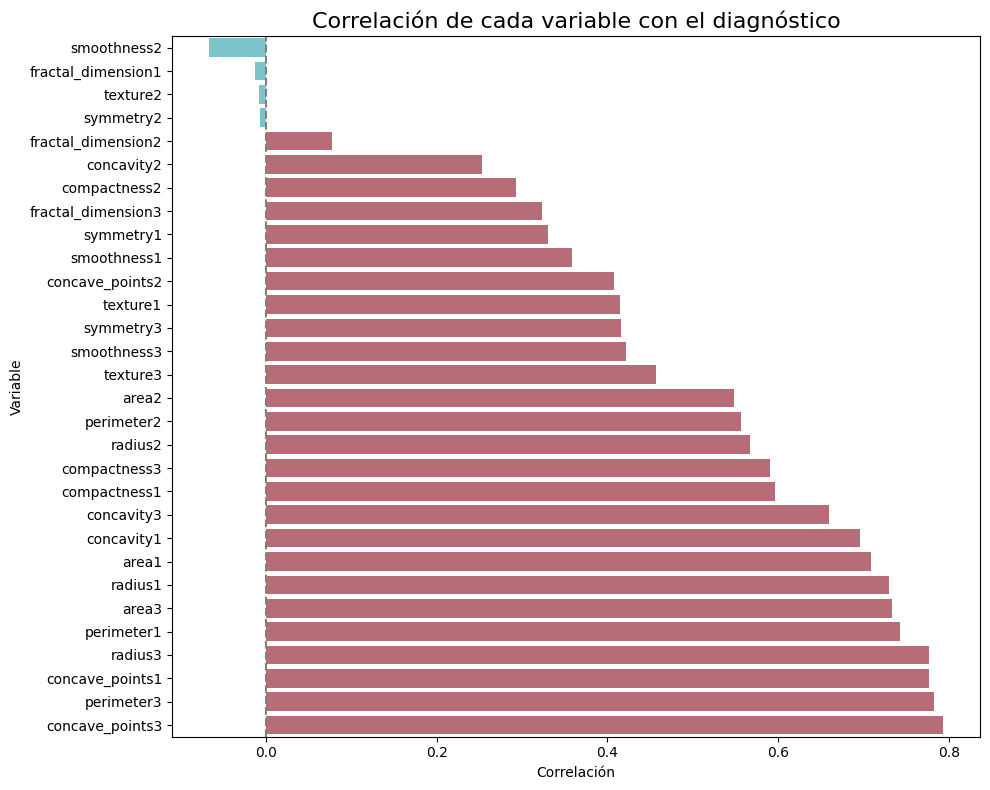

In [ ]:
# Preparar dataframe con columna explícita para las variables
corr_df_sorted = corr_df.reset_index().rename(columns={'index': 'Variable'})
corr_df_sorted = corr_df_sorted.sort_values(by='Correlación con diagnóstico', ascending=True)

# Crear gráfico de barras horizontales con color por tipo
plt.figure(figsize=(10, 8))
sns.barplot(
    data=corr_df_sorted,
    x='Correlación con diagnóstico',
    y='Variable',
    hue='Tipo',
    dodge=False,
    palette={'Benigno': '#6ecfd8', 'Maligno': '#c26170'},
    legend=False
)

plt.title('Correlación de cada variable con el diagnóstico', fontsize=16)
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: me escribes de forma numerica la correlacion de cada variable?

print("Correlación de cada variable con el diagnóstico:")
correlations

Correlación de cada variable con el diagnóstico:


,Diagnosis
smoothness2,-0.067016
fractal_dimension1,-0.012838
texture2,-0.008303
symmetry2,-0.006522
fractal_dimension2,0.077972
concavity2,0.253730
compactness2,0.292999
fractal_dimension3,0.323872
symmetry1,0.330499
smoothness1,0.358560


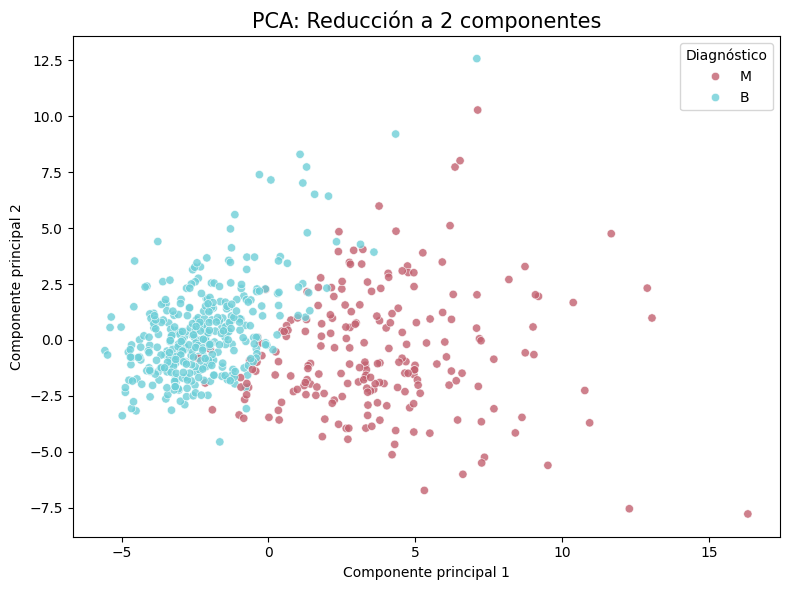

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los componentes y diagnóstico
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Diagnosis': y['Diagnosis']
})

# Definir paleta personalizada
palette = {'M': '#c26170', 'B': '#6ecfd8'}

# Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnosis', palette=palette, alpha=0.8)
plt.title("PCA: Reducción a 2 componentes", fontsize=15)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Diagnóstico")  # NO forzamos labels
plt.tight_layout()
plt.show()



In [ ]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

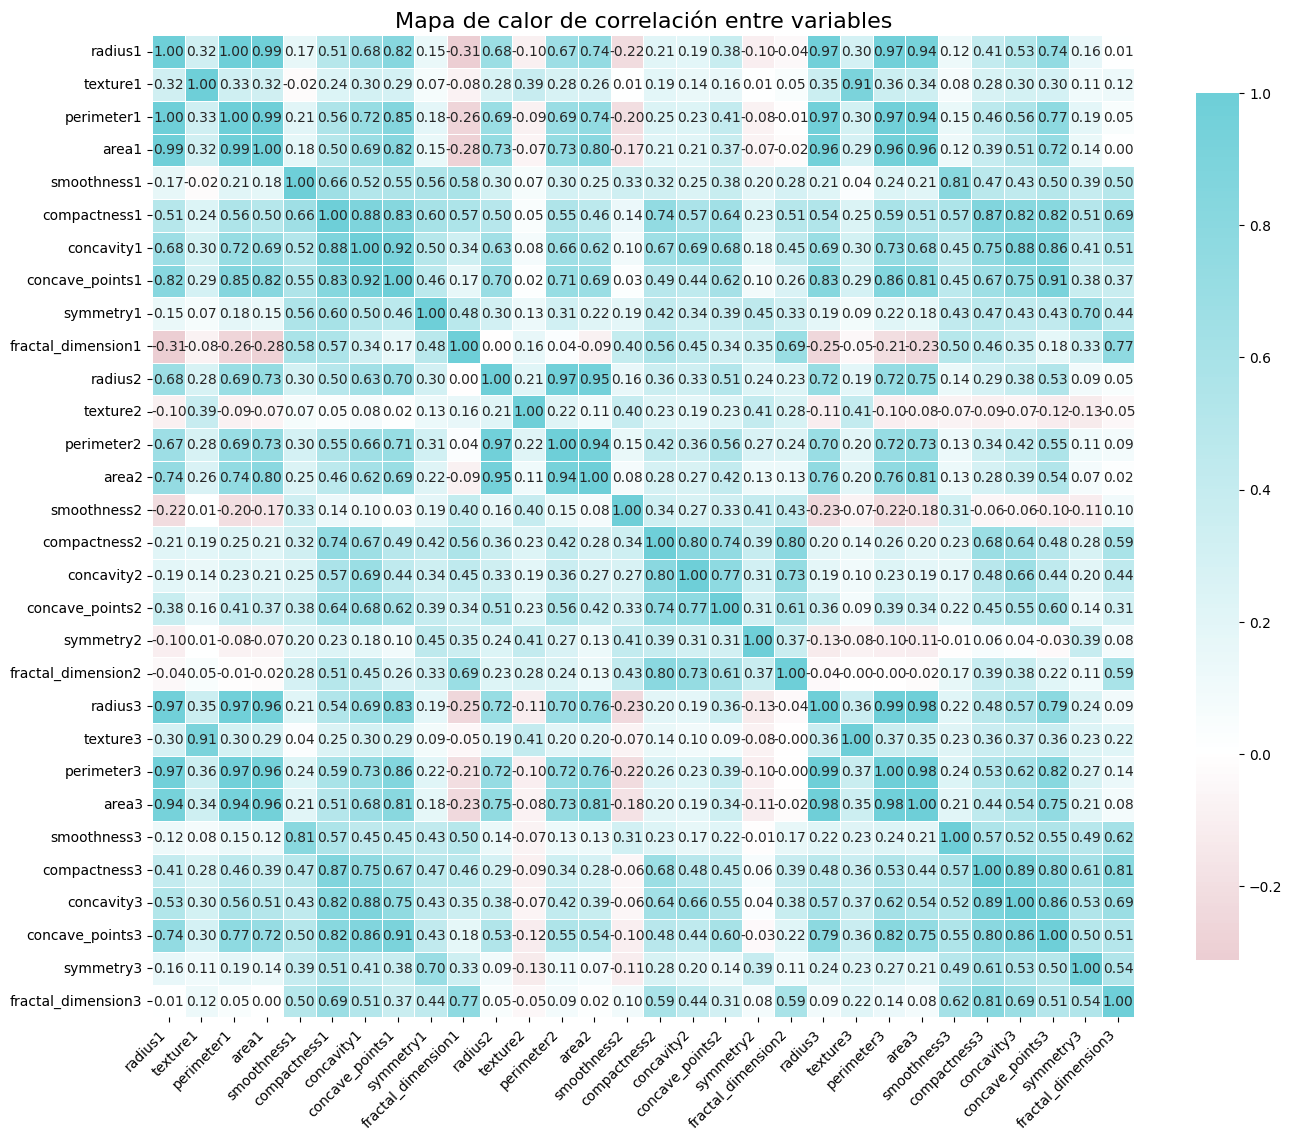

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Crear colormap personalizado: magenta -> blanco -> turquesa
colors = ["#c26170", "#ffffff", "#6ecfd8"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Calcular matriz de correlación
corr = X.corr()

# Graficar heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap=custom_cmap, center=0, annot=True, fmt=".2f", square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Mapa de calor de correlación entre variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


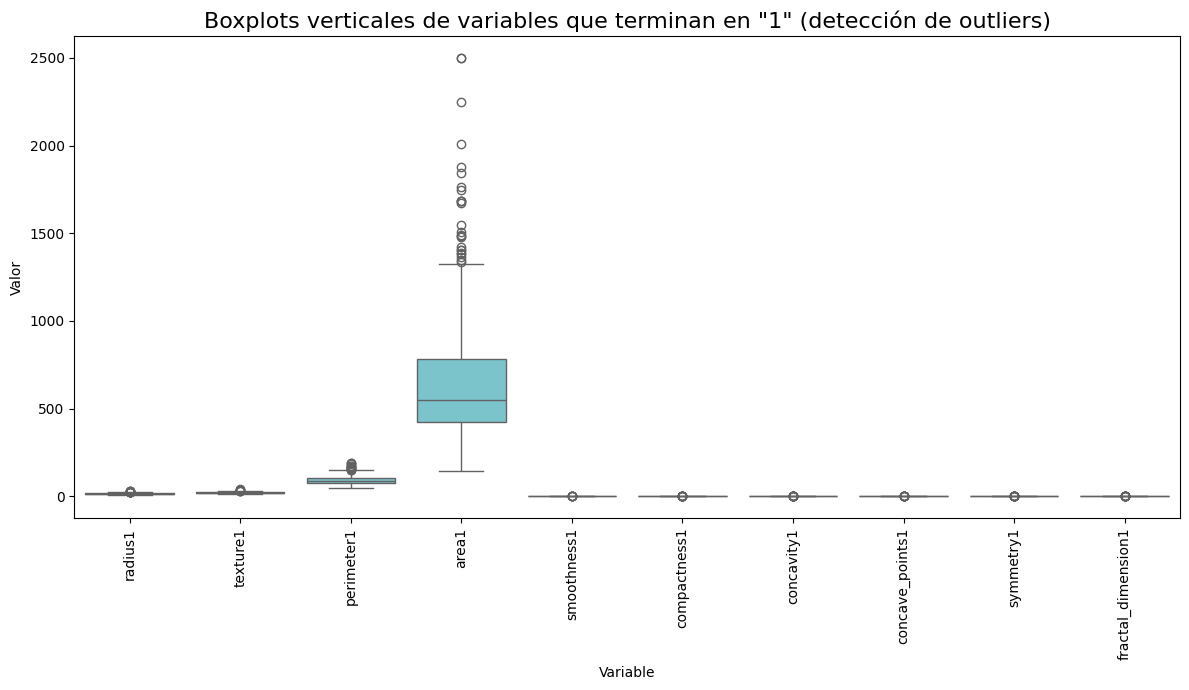

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar columnas que terminan en "1"
cols_ending_1 = [col for col in X.columns if col.endswith('1')]

# Crear dataframe solo con esas columnas
X_1 = X[cols_ending_1]

# Transformar a formato largo
X_long_1 = pd.melt(X_1.reset_index(), id_vars='index', value_vars=cols_ending_1,
                   var_name='Variable', value_name='Valor')

plt.figure(figsize=(12, 7))
sns.boxplot(x='Variable', y='Valor', data=X_long_1, color="#6ecfd8")
plt.xticks(rotation=90)
plt.title('Boxplots verticales de variables que terminan en "1" (detección de outliers)', fontsize=16)
plt.tight_layout()
plt.show()


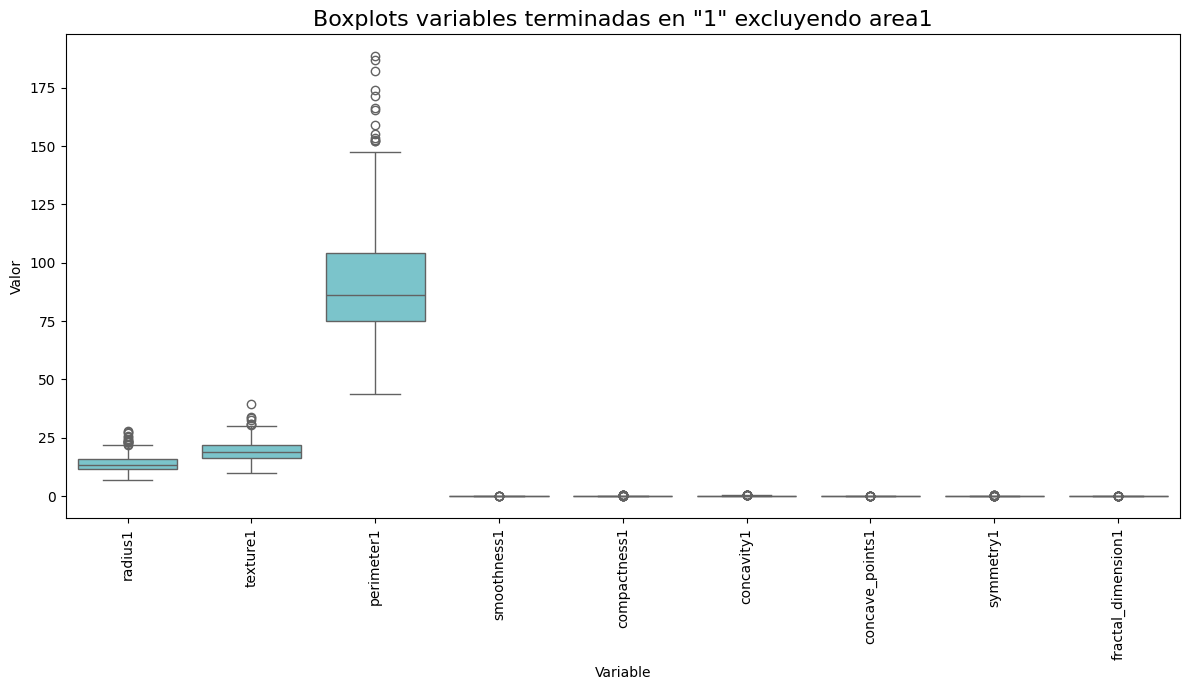

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar columnas que terminan en "1" pero excluyendo 'area1'
cols_ending_1 = [col for col in X.columns if col.endswith('1') and col != 'area1']

# Crear dataframe solo con esas columnas
X_1 = X[cols_ending_1]

# Transformar a formato largo
X_long_1 = pd.melt(X_1.reset_index(), id_vars='index', value_vars=cols_ending_1,
                   var_name='Variable', value_name='Valor')

plt.figure(figsize=(12, 7))
sns.boxplot(x='Variable', y='Valor', data=X_long_1, color="#6ecfd8")
plt.xticks(rotation=90)
plt.title('Boxplots variables terminadas en "1" excluyendo area1', fontsize=16)
plt.tight_layout()
plt.show()


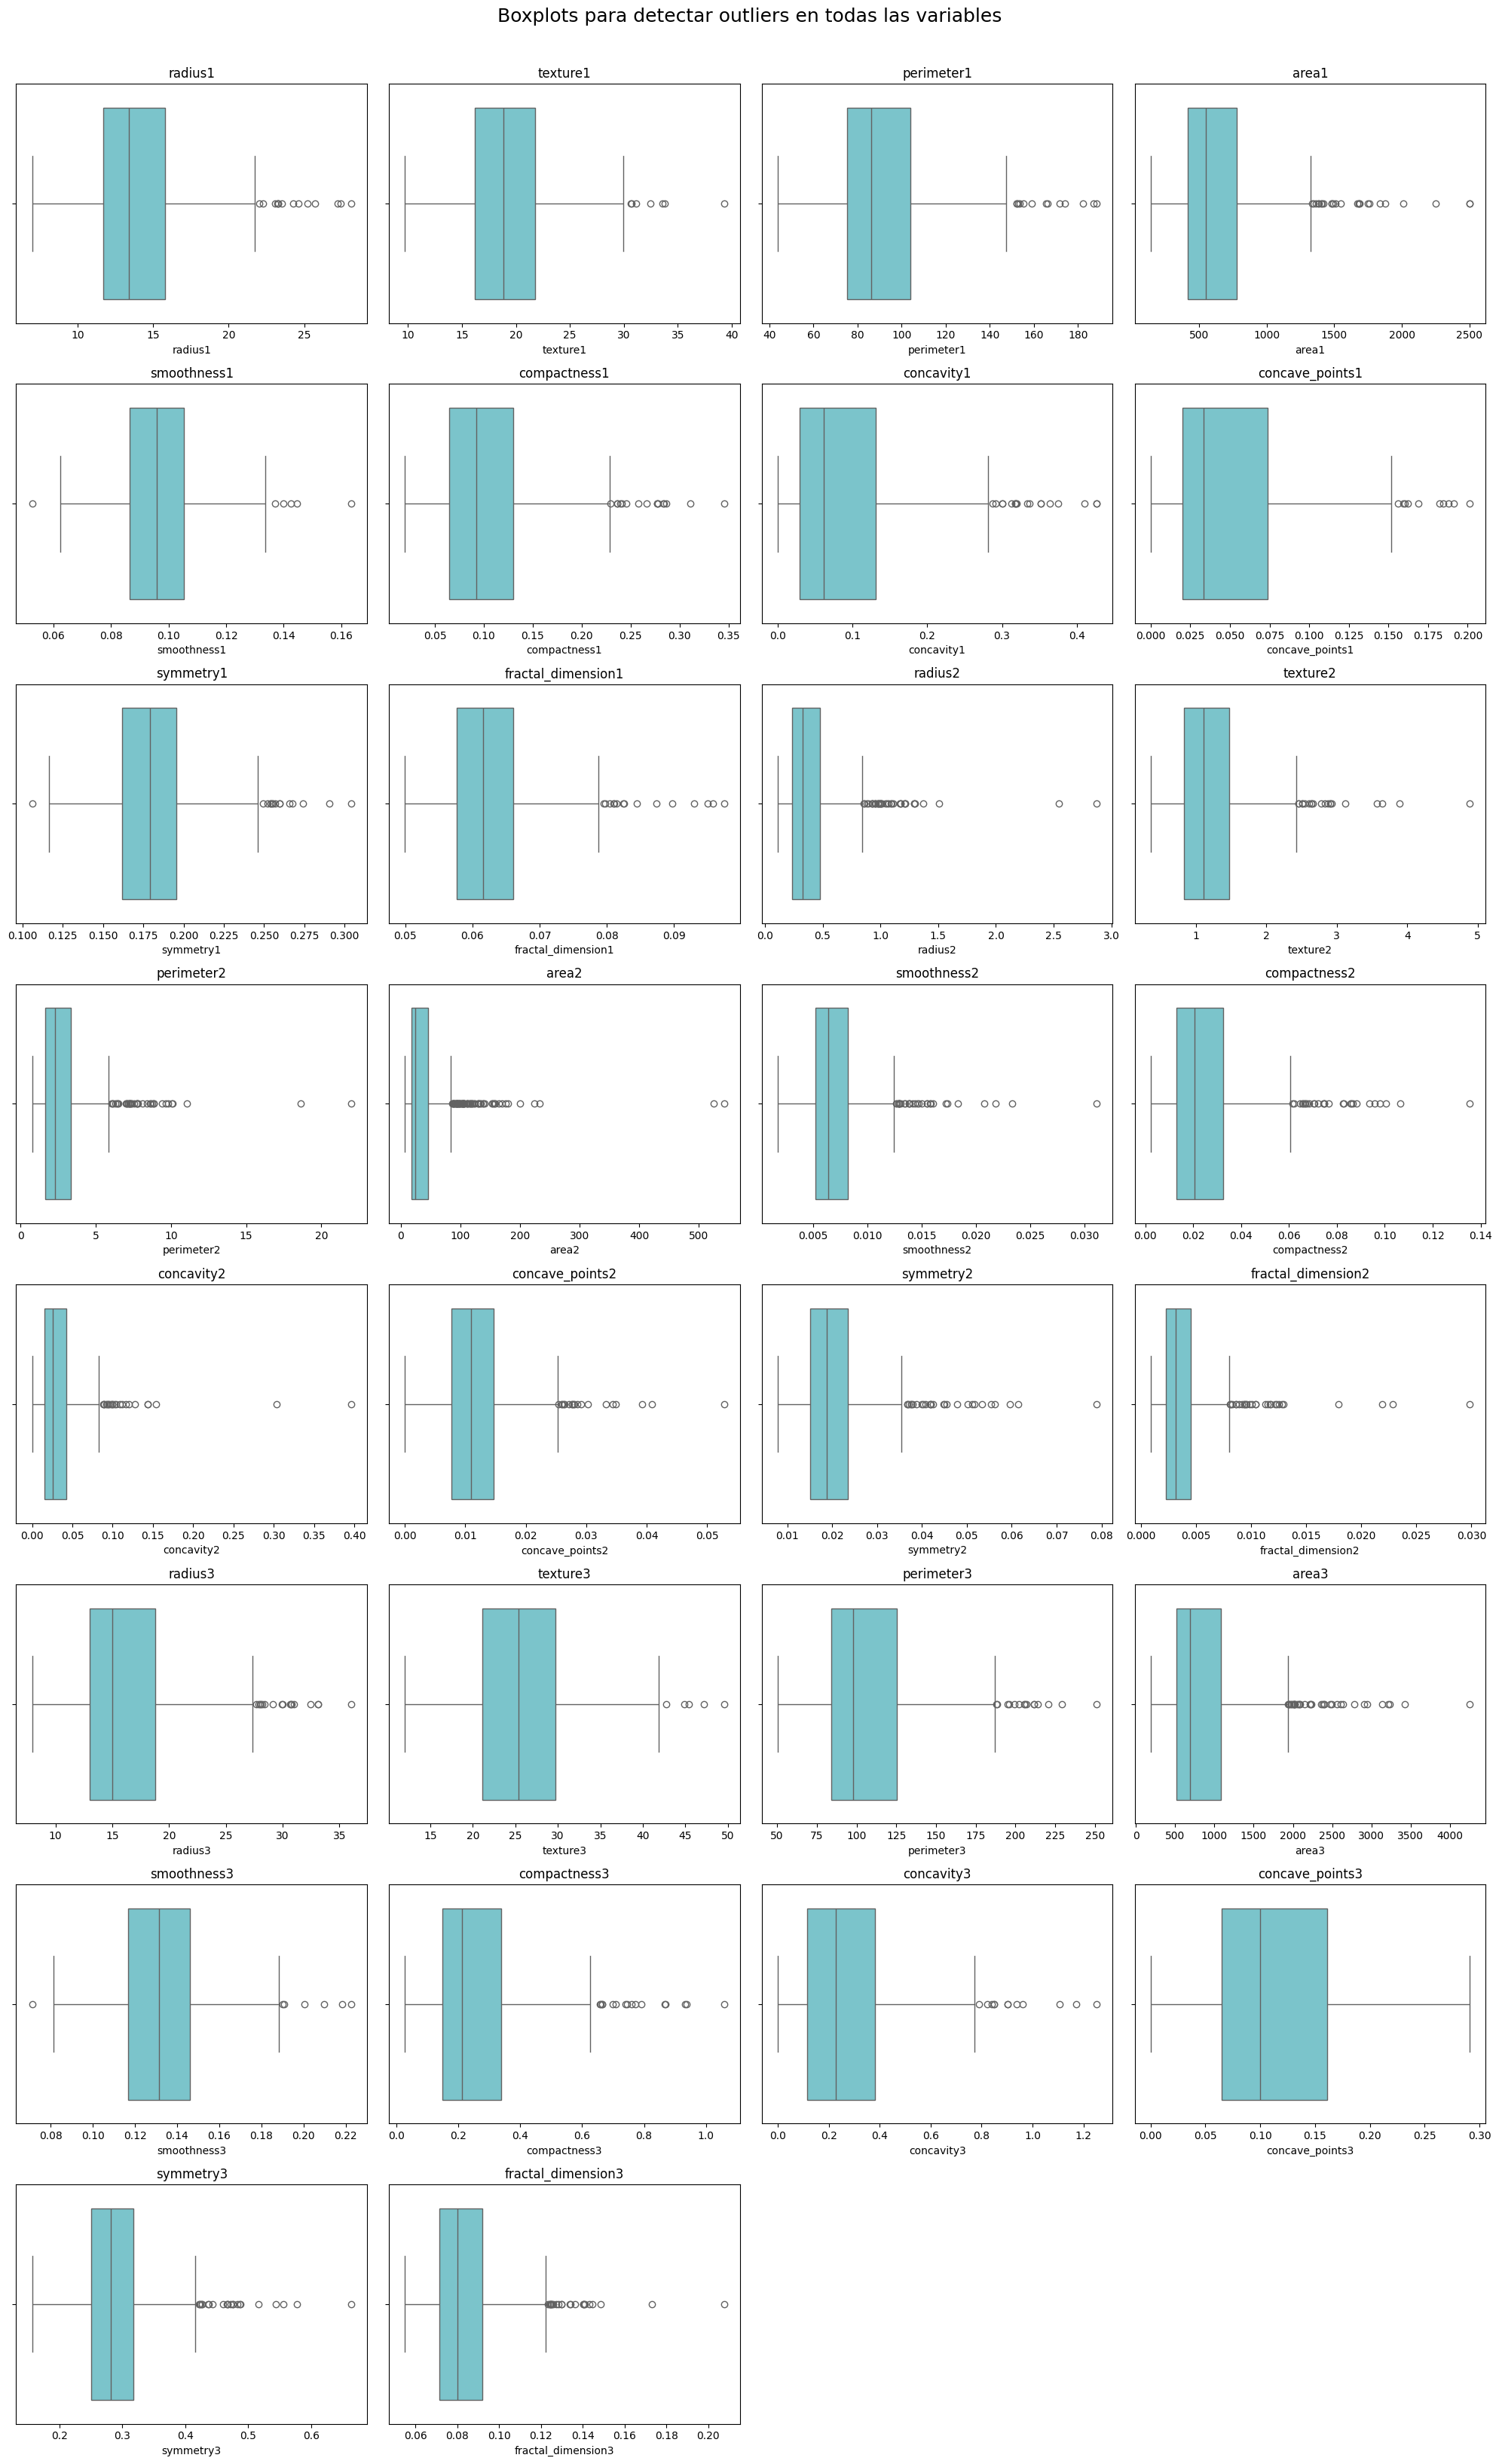

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Cantidad de variables
num_vars = X.shape[1]

# Definir tamaño del grid
cols = 4
rows = math.ceil(num_vars / cols)

plt.figure(figsize=(20, rows * 4))

for i, col in enumerate(X.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=X[col], color="#6ecfd8")
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots para detectar outliers en todas las variables", fontsize=18, y=1.02)
plt.show()


/tmp/ipython-input-3079494209.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Diagnosis', y='concave_points3', palette={'M': '#c26170', 'B': '#6ecfd8'})


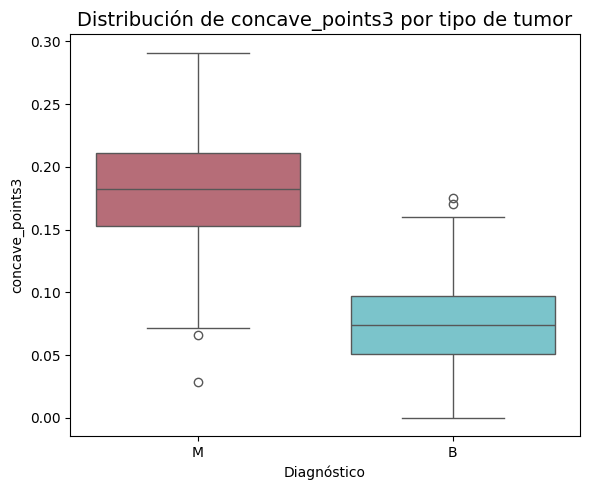

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear DataFrame combinando la variable y el diagnóstico original
df_plot = X.copy()
df_plot['Diagnosis'] = y['Diagnosis']  # Asegurarse de usar la clase original con M y B

plt.figure(figsize=(6, 5))
sns.boxplot(data=df_plot, x='Diagnosis', y='concave_points3', palette={'M': '#c26170', 'B': '#6ecfd8'})
plt.title('Distribución de concave_points3 por tipo de tumor', fontsize=14)
plt.xlabel('Diagnóstico')
plt.ylabel('concave_points3')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4073146498.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Diagnosis', y='smoothness2', palette={'M': '#c26170', 'B': '#6ecfd8'})


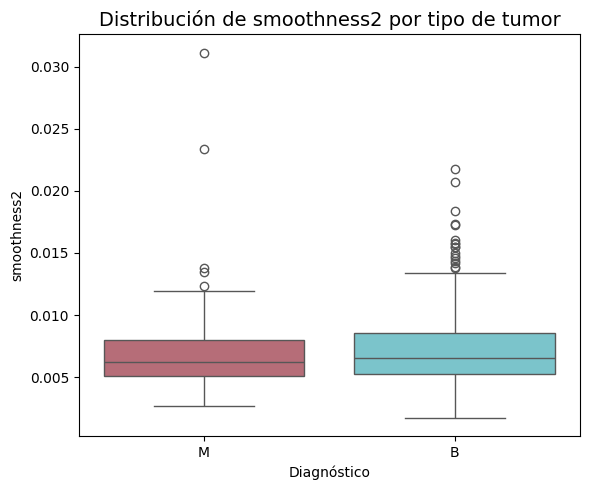

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usamos el mismo DataFrame que ya combina X con Diagnosis
df_plot = X.copy()
df_plot['Diagnosis'] = y['Diagnosis']

plt.figure(figsize=(6, 5))
sns.boxplot(data=df_plot, x='Diagnosis', y='smoothness2', palette={'M': '#c26170', 'B': '#6ecfd8'})
plt.title('Distribución de smoothness2 por tipo de tumor', fontsize=14)
plt.xlabel('Diagnóstico')
plt.ylabel('smoothness2')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Crear el modelo
logreg = LogisticRegression(max_iter=10000)  # A veces necesita más iteraciones para converger

# Entrenar el modelo
logreg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

Accuracy: 0.9385964912280702
Matriz de confusión:
 [[71  1]
 [ 6 36]]
Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.92      0.99      0.95        72
           M       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



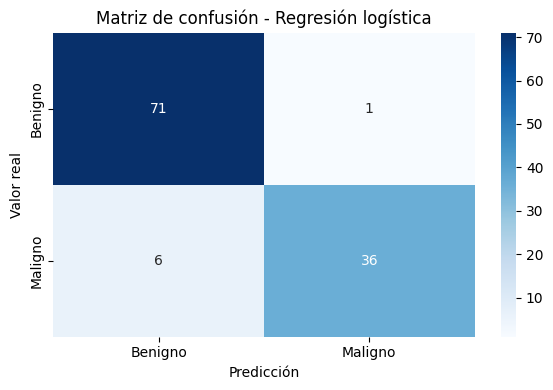

In [ ]:
# Predecir en los datos de prueba
y_pred = logreg.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Graficar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - Regresión logística')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9385964912280702
Matriz de confusión:
 [[70  2]
 [ 5 37]]
Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.93      0.97      0.95        72
           M       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



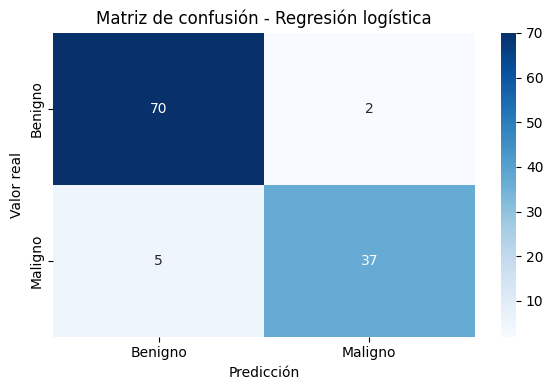

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo con ajuste por desbalance
logreg = LogisticRegression(max_iter=10000, class_weight='balanced')

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = logreg.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Graficar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - Regresión logística')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9298245614035088
Matriz de confusión:
 [[71  1]
 [ 7 35]]
Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.91      0.99      0.95        72
           M       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



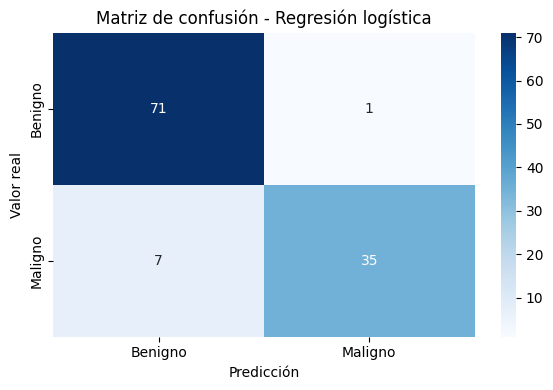

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar las variables especificadas
columnas_a_eliminar = [
    'radius2', 'area2', 'concavity2', 'fractal_dimension1', 'symmetry2',
    'concave_points2', 'smoothness2', 'area3', 'perimeter3',
    'fractal_dimension2', 'area1', 'compactness2'
]
X_filtrado = X.drop(columns=columnas_a_eliminar)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_filtrado, y, test_size=0.2, random_state=42, stratify=y
)

# Crear el modelo con ajuste por desbalance
logreg = LogisticRegression(max_iter=10000)

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = logreg.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Graficar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - Regresión logística')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9649122807017544
Matriz de confusión:
 [[71  1]
 [ 3 39]]
Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



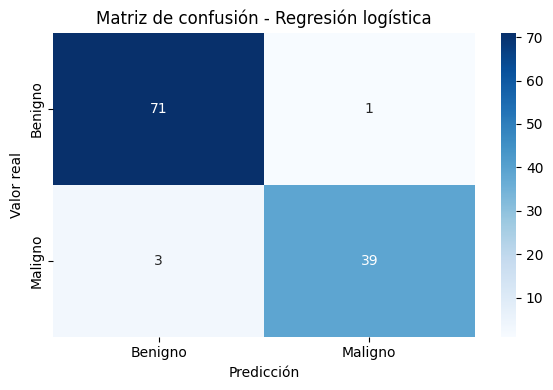

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizar con StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=10000)

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = logreg.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Graficar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - Regresión logística')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9649122807017544
Matriz de confusión:
 [[70  1]
 [ 3 40]]
Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Asegurar que y tenga la forma correcta
y_flat = y.values.ravel()

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_flat, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Realizar predicciones
y_pred = gb.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.956140350877193
Matriz de confusión:
 [[69  2]
 [ 3 40]]
Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
coef = pd.Series(logreg.coef_[0], index=X.columns)
print(coef.sort_values(ascending=False))


texture3              1.434093
radius2               1.233325
symmetry3             1.061264
concave_points1       0.952813
concavity3            0.911406
area2                 0.909029
area3                 0.900477
radius3               0.896968
concavity1            0.782298
perimeter2            0.748295
perimeter3            0.723111
concave_points3       0.703999
texture1              0.482219
concave_points2       0.482089
area1                 0.439950
smoothness3           0.420207
radius1               0.361150
perimeter1            0.353160
smoothness1           0.350622
smoothness2           0.247991
fractal_dimension3    0.054870
fractal_dimension1   -0.080865
concavity2           -0.092341
symmetry1            -0.163991
compactness3         -0.173488
symmetry2            -0.330658
texture2             -0.407611
compactness1         -0.439546
fractal_dimension2   -0.593876
compactness2         -0.906925
dtype: float64


In [ ]:
importancia_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importancia_rf)

concave_points3       0.132983
area3                 0.118973
perimeter3            0.108791
radius3               0.105257
concave_points1       0.104175
concavity1            0.052707
perimeter1            0.047413
radius1               0.046141
area1                 0.040056
concavity3            0.038691
area2                 0.028106
texture3              0.022001
texture1              0.016354
compactness3          0.016227
radius2               0.014574
symmetry3             0.013932
compactness1          0.013404
smoothness3           0.012354
perimeter2            0.010423
smoothness1           0.007183
concavity2            0.006788
fractal_dimension3    0.006333
fractal_dimension2    0.006077
compactness2          0.005363
symmetry2             0.004779
texture2              0.004707
concave_points2       0.004424
fractal_dimension1    0.004156
symmetry1             0.003971
smoothness2           0.003656
dtype: float64


In [ ]:
importancia_gb = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importancia_gb)

concave_points1       0.450444
concave_points3       0.240287
radius3               0.075320
perimeter3            0.051409
texture3              0.039895
area3                 0.038184
texture1              0.027820
concavity3            0.020023
concavity2            0.012551
area2                 0.008462
radius2               0.007613
smoothness3           0.004831
fractal_dimension2    0.004313
texture2              0.003488
compactness1          0.002996
compactness2          0.002847
smoothness1           0.002480
concave_points2       0.001991
concavity1            0.001138
symmetry2             0.000707
symmetry1             0.000464
compactness3          0.000450
fractal_dimension1    0.000434
area1                 0.000429
perimeter2            0.000368
smoothness2           0.000346
symmetry3             0.000247
perimeter1            0.000228
fractal_dimension3    0.000177
radius1               0.000060
dtype: float64


Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')


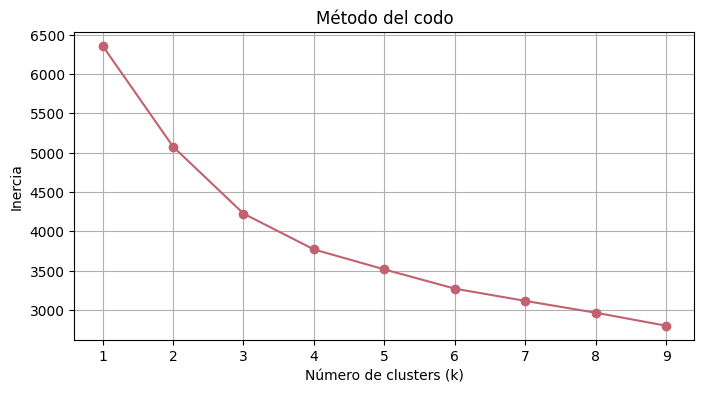

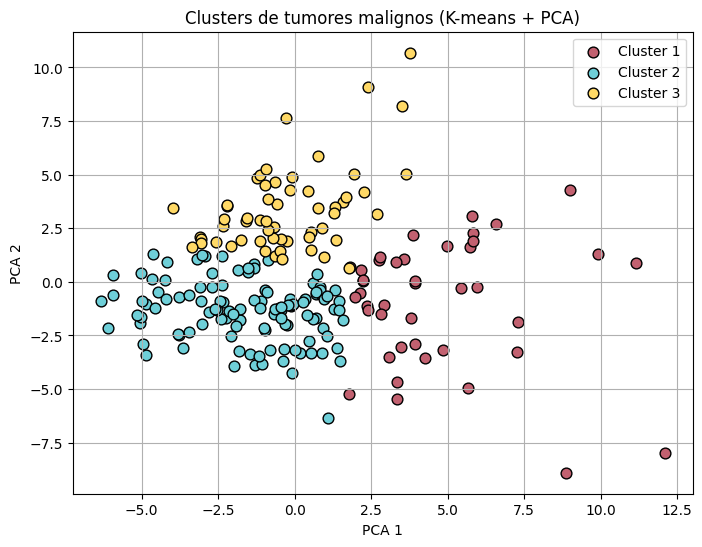

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Unir X e y
data = pd.concat([X, y], axis=1)

# Verificá el nombre real de la columna de diagnóstico
print(data.columns)  # solo la primera vez

# Filtrar solo tumores malignos
malignos = data[data['Diagnosis'] == 'M'].copy()

# Escalar features
X_malignos = malignos.drop(columns=['Diagnosis'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_malignos)

# Método del codo
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', color='#c26170')
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Clustering con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Asignar colores personalizados manualmente
colors = ['#c26170', '#6ecfd8', '#ffd966']
cluster_colors = [colors[i] for i in clusters]

plt.figure(figsize=(8, 6))
for i in range(3):
    idx = clusters == i
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], color=colors[i], label=f'Cluster {i+1}', s=60, edgecolor='k')

plt.title('Clusters de tumores malignos (K-means + PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


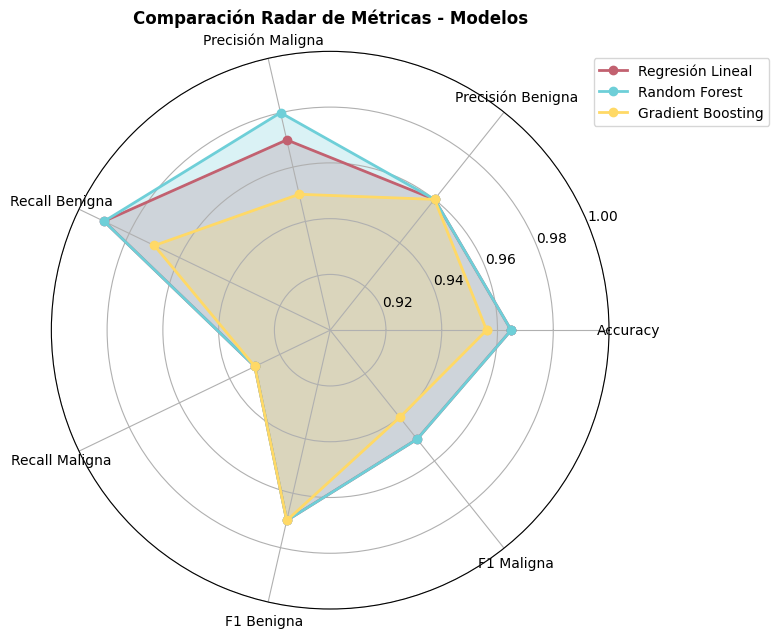

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir colores personalizados para cada modelo
colors = ['#c26170', '#6ecfd8', '#ffd966']

# Modelos
models = ['Regresión Lineal', 'Random Forest', 'Gradient Boosting']

# Métricas
metrics = ['Accuracy', 'Precisión Benigna', 'Precisión Maligna',
           'Recall Benigna', 'Recall Maligna', 'F1 Benigna', 'F1 Maligna']

# Datos para cada modelo
data_models = {
    'Regresión Lineal': [0.9649, 0.96, 0.97, 0.99, 0.93, 0.97, 0.95],
    'Random Forest': [0.9649, 0.96, 0.98, 0.99, 0.93, 0.97, 0.95],
    'Gradient Boosting': [0.9561, 0.96, 0.95, 0.97, 0.93, 0.97, 0.94]
}

# Ángulos para el radar
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Crear figura y eje polar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plotear cada modelo
for i, (model, data) in enumerate(data_models.items()):
    data += data[:1]  # cerrar el círculo
    ax.plot(angles, data, 'o-', linewidth=2, label=model, color=colors[i])
    ax.fill(angles, data, alpha=0.25, color=colors[i])

# Configuración del radar
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=10)
ax.set_ylim(0.9, 1.0)
ax.set_title('Comparación Radar de Métricas - Modelos', fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

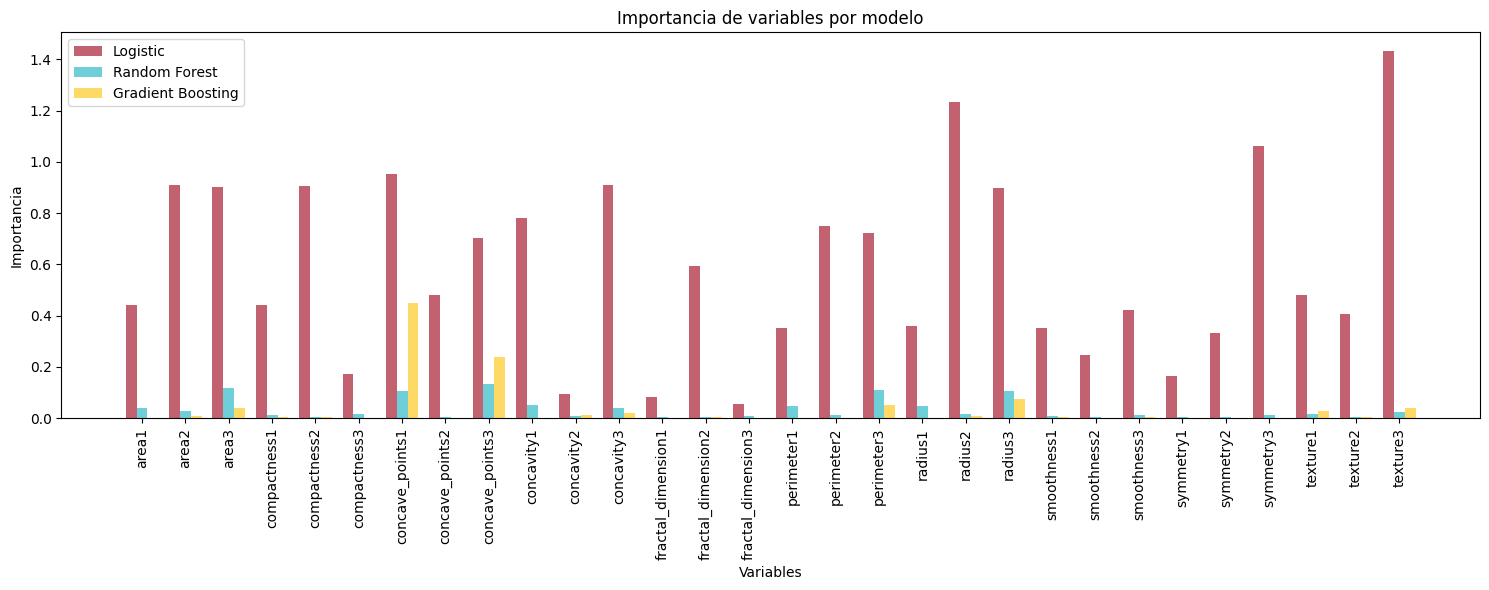

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Diccionarios de importancia (copiados de tus datos)
logistic = {
    'texture3': 1.434093, 'radius2': 1.233325, 'symmetry3': 1.061264, 'concave_points1': 0.952813,
    'concavity3': 0.911406, 'area2': 0.909029, 'area3': 0.900477, 'radius3': 0.896968, 'concavity1': 0.782298,
    'perimeter2': 0.748295, 'perimeter3': 0.723111, 'concave_points3': 0.703999, 'texture1': 0.482219,
    'concave_points2': 0.482089, 'area1': 0.439950, 'smoothness3': 0.420207, 'radius1': 0.361150,
    'perimeter1': 0.353160, 'smoothness1': 0.350622, 'smoothness2': 0.247991, 'fractal_dimension3': 0.054870,
    'fractal_dimension1': 0.080865, 'concavity2': 0.092341, 'symmetry1': 0.163991, 'compactness3': 0.173488,
    'symmetry2': 0.330658, 'texture2': 0.407611, 'compactness1': 0.439546, 'fractal_dimension2': 0.593876,
    'compactness2': 0.906925
}

random_forest = {
    'concave_points3': 0.132983, 'area3': 0.118973, 'perimeter3': 0.108791, 'radius3': 0.105257,
    'concave_points1': 0.104175, 'concavity1': 0.052707, 'perimeter1': 0.047413, 'radius1': 0.046141,
    'area1': 0.040056, 'concavity3': 0.038691, 'area2': 0.028106, 'texture3': 0.022001, 'texture1': 0.016354,
    'compactness3': 0.016227, 'radius2': 0.014574, 'symmetry3': 0.013932, 'compactness1': 0.013404,
    'smoothness3': 0.012354, 'perimeter2': 0.010423, 'smoothness1': 0.007183, 'concavity2': 0.006788,
    'fractal_dimension3': 0.006333, 'fractal_dimension2': 0.006077, 'compactness2': 0.005363,
    'symmetry2': 0.004779, 'texture2': 0.004707, 'concave_points2': 0.004424, 'fractal_dimension1': 0.004156,
    'symmetry1': 0.003971, 'smoothness2': 0.003656
}

gradient_boosting = {
    'concave_points1': 0.450444, 'concave_points3': 0.240287, 'radius3': 0.075320, 'perimeter3': 0.051409,
    'texture3': 0.039895, 'area3': 0.038184, 'texture1': 0.027820, 'concavity3': 0.020023,
    'concavity2': 0.012551, 'area2': 0.008462, 'radius2': 0.007613, 'smoothness3': 0.004831,
    'fractal_dimension2': 0.004313, 'texture2': 0.003488, 'compactness1': 0.002996, 'compactness2': 0.002847,
    'smoothness1': 0.002480, 'concave_points2': 0.001991, 'concavity1': 0.001138, 'symmetry2': 0.000707,
    'symmetry1': 0.000464, 'compactness3': 0.000450, 'fractal_dimension1': 0.000434, 'area1': 0.000429,
    'perimeter2': 0.000368, 'smoothness2': 0.000346, 'symmetry3': 0.000247, 'perimeter1': 0.000228,
    'fractal_dimension3': 0.000177, 'radius1': 0.000060
}

# Convertir a DataFrames
df_logistic = pd.Series(logistic, name='Logistic').reset_index().rename(columns={'index':'Variable', 0:'Importancia'})
df_rf = pd.Series(random_forest, name='Random Forest').reset_index().rename(columns={'index':'Variable', 0:'Importancia'})
df_gb = pd.Series(gradient_boosting, name='Gradient Boosting').reset_index().rename(columns={'index':'Variable', 0:'Importancia'})

# Merge en un solo DataFrame
df = pd.merge(df_logistic, df_rf, on='Variable', how='outer')
df = pd.merge(df, df_gb, on='Variable', how='outer').fillna(0)

# Configurar gráfico
variables = df['Variable']
x = np.arange(len(variables))
width = 0.25

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(x - width, df['Logistic'], width, label='Logistic', color='#c26170')
ax.bar(x, df['Random Forest'], width, label='Random Forest', color='#6ecfd8')
ax.bar(x + width, df['Gradient Boosting'], width, label='Gradient Boosting', color='#ffd966')

ax.set_xlabel('Variables')
ax.set_ylabel('Importancia')
ax.set_title('Importancia de variables por modelo')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()
